In [1]:
import numpy as np
import matplotlib.pyplot as plt

def annealing(alpha):
    gamma = 0.67
    beta = 1/(1+gamma)
    print(beta)
    tau = 0.00001
    #A_tau = (1-tau)/(alpha+(1-alpha)*((1-tau)/1-beta))
    #B_tau = (tau)/(alpha+(1-alpha)*(tau/beta))
    
    x_values = []
    A_values = []
    B_values = []
    
    while (tau) < 1:
        A_tau = (1-tau)/(alpha+(1-alpha)*((1-tau)/(1-beta)))
        B_tau = (tau)/(alpha+(1-alpha)*(tau/beta))
        x_values.append(tau)
        A_values.append(A_tau)
        B_values.append(B_tau)
        tau += 0.01

    plt.plot(x_values,A_values, label = r'$\alpha$ = ' + ' ' + str(alpha))
    plt.plot(x_values,B_values, ls = '--', label = r'$\alpha$ = '+ ' '+ str(alpha))
    plt.xlabel(r'$\tau$', fontsize = '15')
    plt.ylabel('A,B', fontsize = '12')
    #plt.legend(loc='best', bbox_to_anchor = (1.01,0.999))
    plt.show

def graph():
    annealing(0)
    annealing(0.1)
    annealing(0.5)
    annealing(1)
    plt.savefig('Hybrid.pdf', dpi=100, bbox_inches = 'tight')

graph()

0.5988023952095809
0.5988023952095809
0.5988023952095809
0.5988023952095809


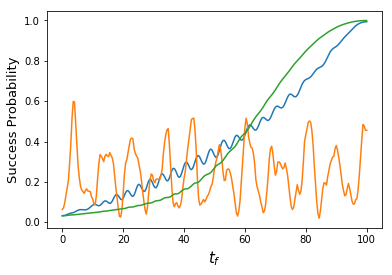

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
np.set_printoptions(threshold=4)

M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.5)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 

    return (np.kron(first_set , I_2))



def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])

    y = np.zeros((2**n,2**n))

    for i in range (h_rows):
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
  
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

#total_H(5)

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_timeDependent1(n,t,alpha,label):
    gamma = 0.67
    label = 0
    beta = 1/(1+gamma)
    t_max = 100
    tau = t/t_max
    A_tau = (1-tau)/(alpha+(1-alpha)*((1-tau)/(1-beta)))
    B_tau = (tau)/(alpha+(1-alpha)*(tau/beta))
    
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term

    total = (-first_term*(A_tau) + total_H(n)*(B_tau))
    
    return total
        
def exponents1(n,alpha,label):
    q = 250
    t_max = 100 
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent1(n,(t_max/q),alpha,label))
    j=0
    horizontal = []
    y = []
    time = 0
    
    while (time/t_max)<1:
        time = j*t_max/q
        horizontal.append(time)
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent1(n,(time),alpha,label)),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        y.append(np.abs(z[19])**2)
        j += 1
        
    final_amplitude = np.dot(exponents_term,ground_state(n))
    plt.plot(horizontal, y, label = r'$\alpha$ = ' + ' ' + str(label))
    plt.xlabel('$t_{ f}$', fontsize = 15)
    plt.ylabel('Success Probability', fontsize = 13)
    #plt.legend()
    axes = plt.gca()
    plt.savefig('HybridSuccess.pdf', dpi = 100, bbox_inches = "tight")

def graph():
    exponents1(5,0.5,0.5)
    exponents1(5,0.0000000000000001,0)
    exponents1(5,1,1)
    plt.savefig('HybridSuccess.pdf', dpi = 100, bbox_inches = "tight")
    plt.show()

graph()



[0.         0.05263158 0.10526316 ... 0.89473684 0.94736842 1.        ]
(20,)
T_max is: 1e-05
Alpha is: 0.0
Associated prob is 0.031250000015888416
Alpha is: 0.05263157894736842
Associated prob is 0.031249999999998553
Alpha is: 0.10526315789473684
Associated prob is 0.03124999999999929
Alpha is: 0.15789473684210525
Associated prob is 0.031249999999998376
Alpha is: 0.21052631578947367
Associated prob is 0.0312499999999993
Alpha is: 0.2631578947368421
Associated prob is 0.03124999999999507
Alpha is: 0.3157894736842105
Associated prob is 0.031249999999996177
Alpha is: 0.3684210526315789
Associated prob is 0.031249999999995726
Alpha is: 0.42105263157894735
Associated prob is 0.031249999999997138
Alpha is: 0.47368421052631576
Associated prob is 0.03124999999999879
Alpha is: 0.5263157894736842
Associated prob is 0.031249999999998876
Alpha is: 0.5789473684210527
Associated prob is 0.03124999999999753
Alpha is: 0.631578947368421
Associated prob is 0.03124999999999808
Alpha is: 0.68421052631578

Associated prob is 0.0641288912206595
T_max is: 22.105269999999997
Alpha is: 0.0
Associated prob is 0.3182648904827829
Alpha is: 0.05263157894736842
Associated prob is 0.19633657828762718
Alpha is: 0.10526315789473684
Associated prob is 0.16685458245538456
Alpha is: 0.15789473684210525
Associated prob is 0.17348907919873796
Alpha is: 0.21052631578947367
Associated prob is 0.20628484024703922
Alpha is: 0.2631578947368421
Associated prob is 0.23767967742338433
Alpha is: 0.3157894736842105
Associated prob is 0.24903841849466823
Alpha is: 0.3684210526315789
Associated prob is 0.23510167725789508
Alpha is: 0.42105263157894735
Associated prob is 0.20393102429479418
Alpha is: 0.47368421052631576
Associated prob is 0.16797369271075463
Alpha is: 0.5263157894736842
Associated prob is 0.1379128661618489
Alpha is: 0.5789473684210527
Associated prob is 0.11755885900415802
Alpha is: 0.631578947368421
Associated prob is 0.10545909850857205
Alpha is: 0.6842105263157894
Associated prob is 0.10156467083

Associated prob is 0.3720325760269069
Alpha is: 0.10526315789473684
Associated prob is 0.3542651917667225
Alpha is: 0.15789473684210525
Associated prob is 0.38472998910020345
Alpha is: 0.21052631578947367
Associated prob is 0.4307540065752588
Alpha is: 0.2631578947368421
Associated prob is 0.43219391215552827
Alpha is: 0.3157894736842105
Associated prob is 0.36663538442761295
Alpha is: 0.3684210526315789
Associated prob is 0.29096701376816386
Alpha is: 0.42105263157894735
Associated prob is 0.277297424446565
Alpha is: 0.47368421052631576
Associated prob is 0.31570144036718195
Alpha is: 0.5263157894736842
Associated prob is 0.3196440850261829
Alpha is: 0.5789473684210527
Associated prob is 0.2709447345330806
Alpha is: 0.631578947368421
Associated prob is 0.24856374607965415
Alpha is: 0.6842105263157894
Associated prob is 0.2696541977856358
Alpha is: 0.7368421052631579
Associated prob is 0.24686782094505663
Alpha is: 0.7894736842105263
Associated prob is 0.22435655435758187
Alpha is: 0.8

Associated prob is 0.5178804055790998
Alpha is: 0.21052631578947367
Associated prob is 0.5138239805055284
Alpha is: 0.2631578947368421
Associated prob is 0.4809342109681488
Alpha is: 0.3157894736842105
Associated prob is 0.44593905901173064
Alpha is: 0.3684210526315789
Associated prob is 0.45205821859596496
Alpha is: 0.42105263157894735
Associated prob is 0.49854953678724384
Alpha is: 0.47368421052631576
Associated prob is 0.5244776980938555
Alpha is: 0.5263157894736842
Associated prob is 0.5073472150496597
Alpha is: 0.5789473684210527
Associated prob is 0.506431530816902
Alpha is: 0.631578947368421
Associated prob is 0.5332339886472244
Alpha is: 0.6842105263157894
Associated prob is 0.5365582102763446
Alpha is: 0.7368421052631579
Associated prob is 0.5346156081412068
Alpha is: 0.7894736842105263
Associated prob is 0.5532703132252601
Alpha is: 0.8421052631578947
Associated prob is 0.5533616129352275
Alpha is: 0.894736842105263
Associated prob is 0.5640904758503417
Alpha is: 0.947368421

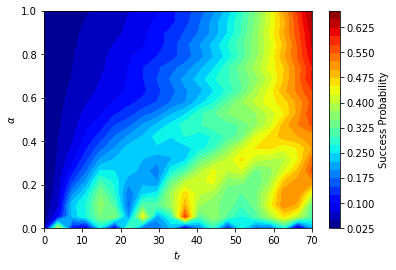

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.linalg import expm
np.set_printoptions(threshold=4)

M = ([[0,1,1,0,0],
       [0,0,1,0,1],
       [0,0,0,1,1],
       [0,0,0,0,0],
       [0,0,0,0,0]])

J_capital = np.array(M)
h = []
kappa = float(0.5)


def h_calc():
    rows = (np.shape(J_capital)[0])
    columns = (np.shape(J_capital)[1])
    for k in range(rows):
        total = 0
        for j in range(columns):
            x = -1*(M[k][j]+M[j][k])
            total = total + x
        h.append([total+kappa])
    return 

h_calc()

def sigma_z_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_z = [[1,0],
              [0,-1]]
    first_set = np.kron(I_1,sigma_z) 

    return (np.kron(first_set , I_2))

def sigma_x_j(n,j):
    I_1 = np.identity(2**(j-1))
    I_2 = np.identity(2**(n-1-j+1))
    sigma_x = [[0,1],
              [1,0]]
    first_set = np.kron(I_1,sigma_x) 
    return (np.kron(first_set , I_2))


def H_ising1(n):
    J_rows = (np.shape(J_capital)[0])
    J_columns = (np.shape(J_capital)[1])
    x = np.zeros((2**n,2**n))
    for i in range (J_rows):
        for j in range(i+1,J_columns):
            x = J_capital[i][j]*np.array(sigma_z_j(n,i+1))*np.array(sigma_z_j(n,j+1)) + x
    return x
                     
def H_ising2(n):
    h_rows = (np.shape(h)[0])

    y = np.zeros((2**n,2**n))

    for i in range (h_rows):
        y = h[i][0]*np.array(sigma_z_j(n,i+1)) + y
  
    return y

def total_H(n):
    return H_ising1(n)+H_ising2(n)

#total_H(5)

def ground_state(n):
    bit_flip = 1/(np.sqrt(2))*np.array([[1],
                                  [1]])
    first = bit_flip
    for i in range(n-1):
        first = np.kron(first,bit_flip)
    return first

def H_timeDependent1(n,t,alpha):
    gamma = 0.67
    label = 0
    beta = 1/(1+gamma)
    t_max = 100
    tau = t/t_max
    A_tau = (1-tau)/(alpha+(1-alpha)*((1-tau)/(1-beta)))
    B_tau = (tau)/(alpha+(1-alpha)*(tau/beta))
    
    first_term = np.zeros((2**n,2**n))
    
    for j in range(n):
        first_term = np.array(sigma_x_j(n,j+1)) + first_term

    total = (-first_term*(A_tau) + total_H(n)*(B_tau))
    
    return total
        
    
def exponents1(n,alpha,t_max):
    q = 250
    i = 1j
    exponents_term = expm(i*(t_max/q)*H_timeDependent1(n,(t_max/q),alpha))
    time = 0
    j=1
    
    while (time/t_max)<1:
        time = j*t_max/q
        exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent1(n,(time),alpha)),exponents_term)
        z = np.dot(exponents_term,ground_state(n))
        j += 1
        
    return np.abs(z[19])**2
  
    '''time = j*t_max/q
    exponents_term = np.dot(expm(i*(t_max/q)*H_timeDependent1(n,(time),alpha)),exponents_term)
    z = np.dot(exponents_term,ground_state(n))
    return (np.abs(z[19])**2)'''
    
  
def graph(n):
    yp = np.linspace(0, 1, 20)
    print(yp)
    print(np.shape(yp))
    tp = np.linspace(0.00001,70,20)
    #horizontal = jp*100/250
    #print(np.shape(horizontal))
    #print(horizontal)
    
    prob = np.ndarray((20,20))
    
    for x in range(0, len(tp)):
        print('T_max is:', tp[x])
        for y in range(0, len(yp)):
            print('Alpha is:', yp[y])
            prob[y][x] = exponents1(n,yp[y],tp[x])
            print('Associated prob is',  prob[y][x])
            
    print(prob)

    X,Y = np.meshgrid(tp, yp)
    print(X)
    print(Y)
    plt.contourf(X, Y, prob, 30, cmap=cm.jet)
    cbar = plt.colorbar()
    cbar.set_label('Success Probability')
    plt.xlabel('$t_{ f}$')
    plt.ylabel(r'$\alpha$')
    plt.savefig('ContourPlot.pdf', dpi = 100, bbox_inches = "tight")
    plt.show()
    
graph(5)
#exponents1(5,1,3)